## Pandas

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

#### Import Libraries

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [4]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [5]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [6]:
ser[1]

'foo'

In [7]:

ser[[2]]=500

In [9]:
ser.loc[['nancy','tom','bob']]

nancy    500
tom      100
bob      foo
dtype: object

In [8]:
ser['nancy']=500

In [16]:
ser

tom      100
bob      foo
nancy    500
dan      bar
eric     500
dtype: object

In [17]:
ser[[1,2,3]]

bob      foo
nancy    500
dan      bar
dtype: object

In [18]:
ser[[2, 3, 0]]

nancy    500
dan      bar
tom      100
dtype: object

In [19]:
ser.iloc[[2,3]]

nancy    500
dan      bar
dtype: object

In [20]:
'tom' in ser

True

In [21]:
'xx' in ser

False

In [22]:
ser

tom      100
bob      foo
nancy    500
dan      bar
eric     500
dtype: object

In [23]:
ser * 3

tom            300
bob      foofoofoo
nancy         1500
dan      barbarbar
eric          1500
dtype: object

In [24]:
ser[['tom', 'eric']] ** 3

tom       1000000
eric    125000000
dtype: object

In [18]:
ser['tom']=200

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [25]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [26]:
d

{'one': apple    100.0
 ball     200.0
 clock    300.0
 dtype: float64,
 'two': apple      111.0
 ball       222.0
 cerill     333.0
 dancy     4444.0
 dtype: float64}

In [27]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [16]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [17]:
df.columns

Index(['one', 'two'], dtype='object')

In [7]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple','cerill','clock'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0
cerill,NaN,333.0
clock,300.0,NaN


In [28]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['name', 'age'])

,name,age
dancy,NaN,NaN
ball,NaN,NaN
apple,NaN,NaN


In [24]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [25]:
d  

{'one': apple    100.0
 ball     200.0
 clock    300.0
 dtype: float64, 'two': apple      111.0
 ball       222.0
 cerill     333.0
 dancy     4444.0
 dtype: float64}

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [29]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
data

[{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [30]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [31]:
data[0]

{'alex': 1, 'joe': 2}

In [31]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [33]:
pd.DataFrame(data, columns=['joe', 'ema','alice'])

,joe,ema,alice
0,2.0,NaN,NaN
1,NaN,5.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [32]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [33]:
df['two']

apple      111.0
ball       222.0
cerill     333.0
clock        NaN
dancy     4444.0
Name: two, dtype: float64

In [34]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [34]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [35]:
df.pop('three')

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [36]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [38]:
df['flag'] = df['two'] >= 65
df

,one,two,flag
apple,100.0,111.0,True
ball,200.0,222.0,True
cerill,NaN,333.0,True
clock,300.0,NaN,False
dancy,NaN,4444.0,True


In [39]:
df.pop('flag')

apple      True
ball       True
cerill     True
clock     False
dancy      True
Name: flag, dtype: bool

In [41]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [102]:
del df['two']

In [43]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [41]:
df.insert(1, 'copy_of_one', df['one'])
df

,one,copy_of_one,two
apple,100.0,100.0,111.0
ball,200.0,200.0,222.0
cerill,NaN,NaN,333.0
clock,300.0,300.0,NaN
dancy,NaN,NaN,4444.0


In [ ]:
df.insert()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [43]:
import os

import pandas as pd

os.chdir('F:\Training Python\ml-latest-small\ml-latest-small')

movies = pd.read_csv('movies.csv')



In [44]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [35]:
# Note: Adjust the name of the folder to match your local directory

!dir .\movielens

 Volume in drive C has no label.
 Volume Serial Number is EE5D-86FB

 Directory of C:\Users\Arindam\Downloads



File Not Found


In [33]:
!head -5 .\movielens\ratings.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [46]:
#movies = pd.read_csv('./movielens/movies.csv', encoding='latin-1')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('tags.csv', encoding='latin-1' )
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [48]:
ratings = pd.read_csv('ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [53]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [50]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[1]
type(row_0)

pandas.core.series.Series

In [51]:
print(row_0)

userId                     2
movieId                60756
tag          Highly quotable
timestamp         1445714996
Name: 1, dtype: object


In [52]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [53]:
row_0['userId']

2

In [54]:
'userId' in row_0

True

In [118]:
row_0.name

0

In [57]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [55]:
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [56]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [57]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [58]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [10,11,200] ]

,userId,movieId,tag,timestamp
10,18,431,Al Pacino,1462138765
11,18,431,gangster,1462138749
200,62,60074,bad script,1525554116


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [59]:
ratings['movieId'].describe()

count    100836.000000
mean      19435.295718
std       35530.987199
min           1.000000
25%        1199.000000
50%        2991.000000
75%        8122.000000
max      193609.000000
Name: movieId, dtype: float64

In [60]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [11]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [61]:
ratings['rating'].mean()

3.501556983616962

In [23]:
ratings.mean()

userId       3.261276e+02
movieId      1.943530e+04
rating       3.501557e+00
timestamp             inf
dtype: float64

In [62]:
ratings['rating'].min()

0.5

In [63]:
ratings['rating'].max()

5.0

In [64]:
ratings['rating'].std()

1.0425292390605359

In [65]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [67]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [11]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [68]:
movies.shape

(9742, 3)

In [69]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [70]:
ratings.shape

(100836, 4)

In [71]:
#is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Thats nice ! No NULL values !

In [72]:
tags.shape

(3683, 4)

In [73]:
#is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

We have some tags which are NULL.

In [21]:
tags = tags.dropna()

In [142]:
#Check again: is any row NULL ?

tags.isnull().any()

userId      False
movie_id    False
tag         False
dtype: bool

In [143]:
tags.shape

(2213, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

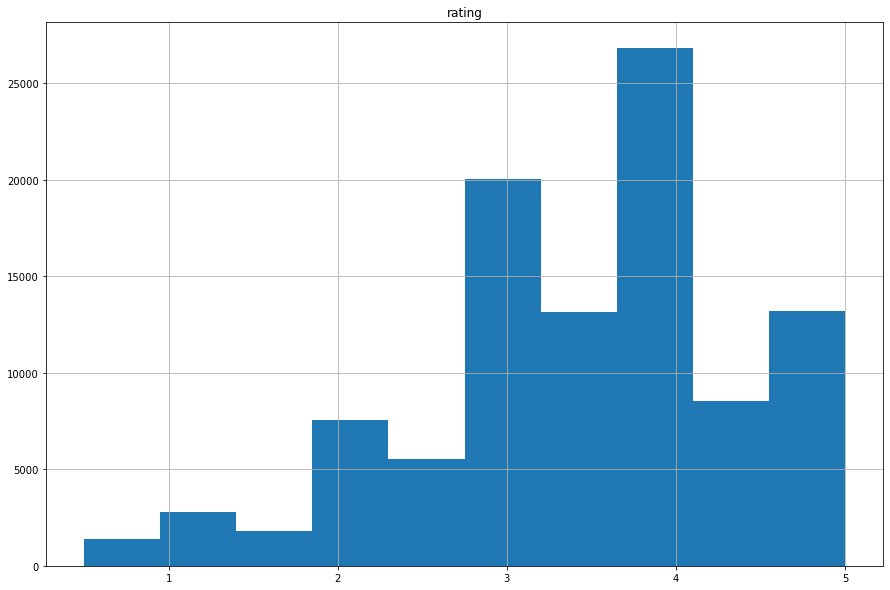

In [76]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

<AxesSubplot:>

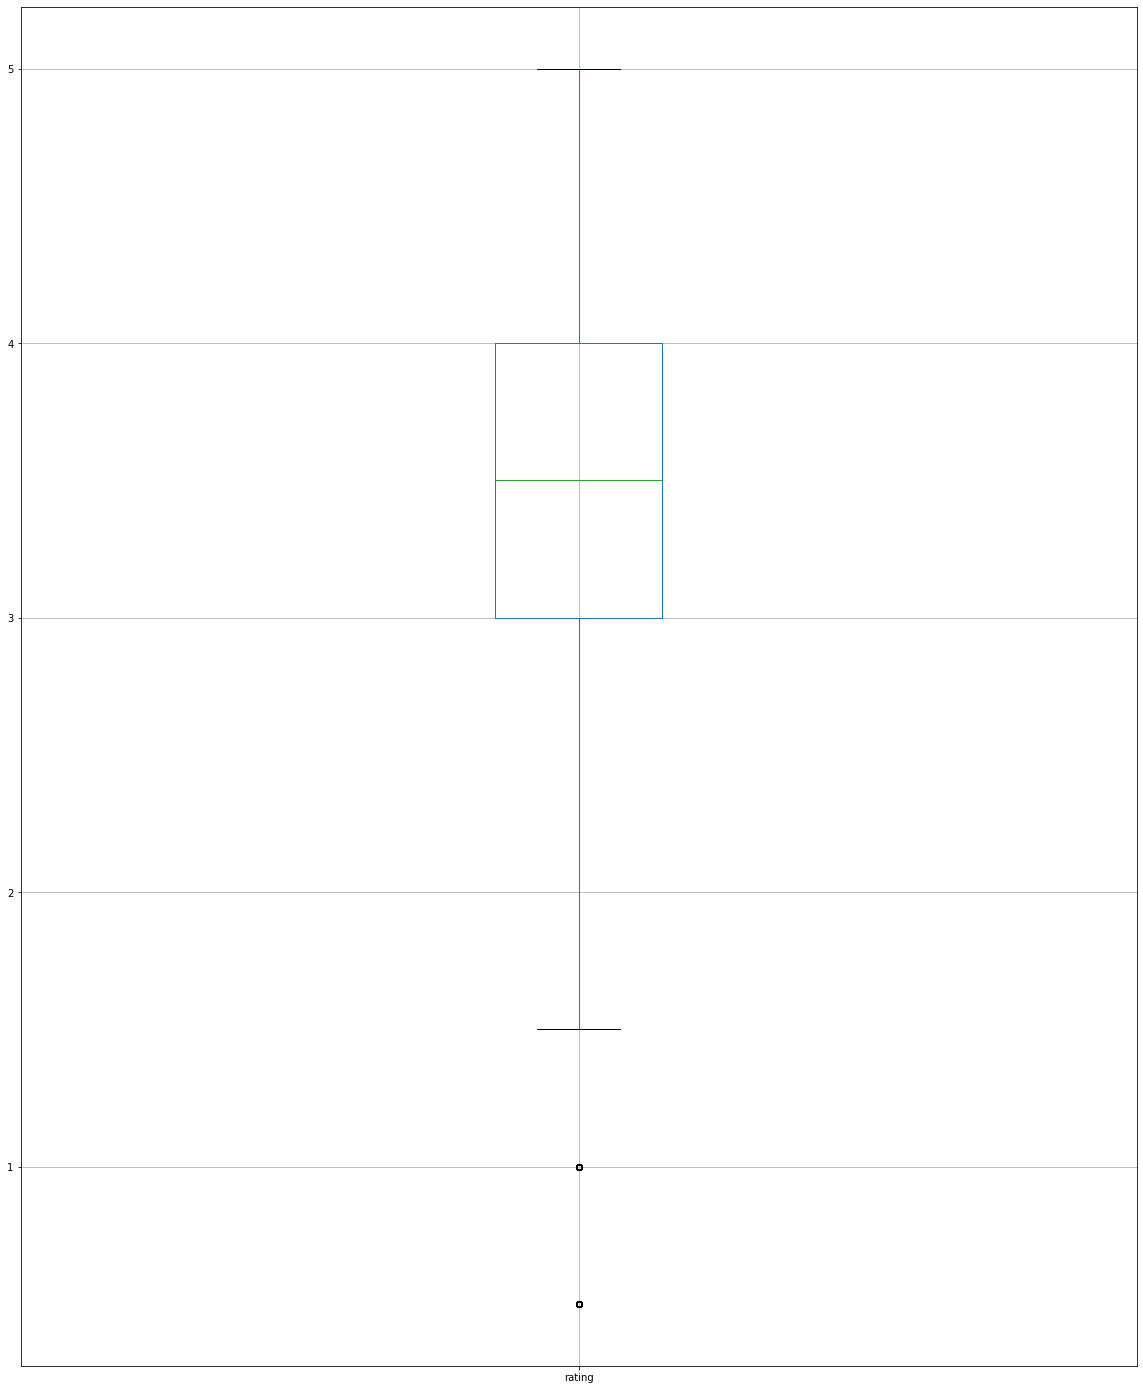

In [77]:
ratings.boxplot(column='rating', figsize=(20,25))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [78]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [79]:
movies[['title','genres']].head(20)

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


In [85]:
ratings[-10:]

,userId,movieId,rating,timestamp
100826,610,162350,3.5,1493849971
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [86]:
movies_counts = movies['movieId'].value_counts()
movies_counts[-10:]

4783      1
685       1
2732      1
149144    1
8873      1
60072     1
4775      1
50601     1
131749    1
83969     1
Name: movieId, dtype: int64

<AxesSubplot:>

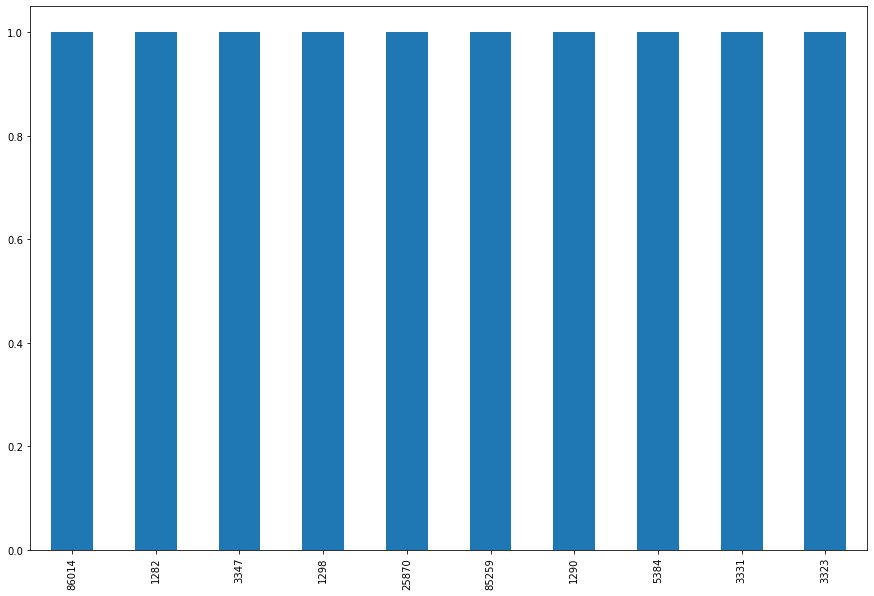

In [88]:
movies_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [89]:
is_animation = movies['genres'].str.contains('Comedy', na=True)

movies[is_animation]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9734,193571,Silver Spoon (2014),Comedy|Drama
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy


In [90]:
is_animation = movies['genres'].str.contains('Animation', na=True)

movies[is_animation]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
...,...,...,...
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy


In [91]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [94]:
import os

os.chdir('F:\Training Python\ml-latest-small\ml-latest-small')

ratings = pd.read_csv('ratings.csv', encoding='latin-1')






In [95]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [28]:
ratings.loc[1]


userId               1.0
movieId              3.0
rating               4.0
timestamp    964981247.0
Name: 1, dtype: float64

In [97]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [98]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [36]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
193581,1
193583,1
193585,1
193587,1
193609,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [99]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [100]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

Combine aggreagation, merging, and filters to get useful analytics

In [102]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating,timestamp
0,1,3.920930,1.129835e+09
1,2,3.431818,1.135805e+09
2,3,3.259615,1.005110e+09
3,4,2.357143,8.985789e+08
4,5,3.071429,9.926643e+08


In [103]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating,timestamp
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5,1.537110e+09
9721,193585,Flint (2017),Drama,3.5,1.537110e+09
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5,1.537110e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09


In [104]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5,1.537109e+09
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0,1.537099e+09
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0,1.537100e+09
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09


In [105]:
is_comedy = box_office['genres'].str.contains('Comedy', na=False)

box_office[is_comedy][:5]

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1.129835e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1.005110e+09
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,8.985789e+08
4,5,Father of the Bride Part II (1995),Comedy,3.071429,9.926643e+08
6,7,Sabrina (1995),Comedy|Romance,3.185185,9.665462e+08


In [106]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.0,1.530148e+09
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5,1.537109e+09
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0,1.537099e+09
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09
